In [32]:
import pandas as pd
import os

# Specifying the path of the dataset
folder_path = "./cleaned_dataset" 

# Listing all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Combining all CSV files into a single DataFrame
dataframes = []
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path)
    dataframes.append(data)# Filter the rows where the 'type' is 'impedance'

# Merging all DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)
print(combined_data.head())

        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   

             Capacity                   Re                  Rct  
0  1.6743047446975208                  NaN                  NaN  
1                 NaN  0.05605783343888099  0.20097016584458333  
2                 NaN     

In [33]:
# Filter the rows where the 'type' is 'impedance'
impedance_data = combined_data[combined_data['type'] == 'impedance']
print(impedance_data.head())

         type                                         start_time  \
1   impedance  [2010.       7.      21.      16.      53.    ...   
3   impedance                    [2010    7   21   20   31    5]   
13  impedance  [2010.       7.      22.      17.       3.    ...   
15  impedance        [2010.     7.    22.    20.    40.    25.5]   
17  impedance  [2010.       7.      23.      11.      35.    ...   

    ambient_temperature battery_id  test_id  uid   filename Capacity  \
1                    24      B0047        1    2  00002.csv      NaN   
3                    24      B0047        3    4  00004.csv      NaN   
13                   24      B0047       13   14  00014.csv      NaN   
15                   24      B0047       15   16  00016.csv      NaN   
17                   24      B0047       17   18  00018.csv      NaN   

                      Re                  Rct  
1    0.05605783343888099  0.20097016584458333  
3    0.05319185850921101  0.16473399914864734  
13   0.0596379

In [34]:
#Filtering the required columns: Resistance of Electrolytes 'Re' and Resistance on Charge Transfer 'Rct'
df = impedance_data[['Re', 'Rct']]
print(df.head())

                      Re                  Rct
1    0.05605783343888099  0.20097016584458333
3    0.05319185850921101  0.16473399914864734
13   0.05963791501051059  0.21039872263834902
15   0.05512505361624278   0.1754882075917004
17  0.058878485312444453  0.19095687096090014


In [35]:
# Filtering rows where 'Re' and 'Rct' are not NaN
df_cleaned = df.dropna(subset=['Re', 'Rct'])
print(df_cleaned.head())

                      Re                  Rct
1    0.05605783343888099  0.20097016584458333
3    0.05319185850921101  0.16473399914864734
13   0.05963791501051059  0.21039872263834902
15   0.05512505361624278   0.1754882075917004
17  0.058878485312444453  0.19095687096090014


In [36]:
# Adding a sequential 'cycle_count' for plotting
df_cleaned.loc[:, 'cycle_count'] = range(1, len(df_cleaned) + 1)

# Display the first few rows of the updated DataFrame to verify
print(df_cleaned.head())

                      Re                  Rct  cycle_count
1    0.05605783343888099  0.20097016584458333            1
3    0.05319185850921101  0.16473399914864734            2
13   0.05963791501051059  0.21039872263834902            3
15   0.05512505361624278   0.1754882075917004            4
17  0.058878485312444453  0.19095687096090014            5


In [37]:
import plotly.express as px

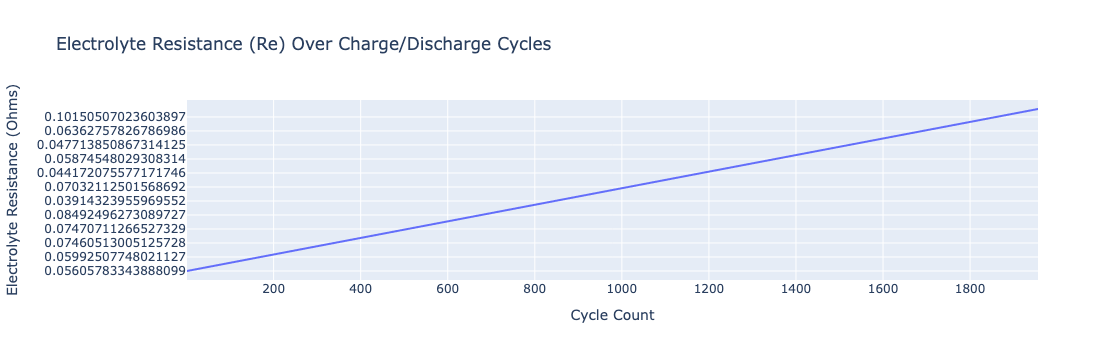

In [38]:
#Linne plot for 'Re'
fig1 = px.line(df_cleaned, x='cycle_count', y='Re', 
               title='Electrolyte Resistance (Re) Over Charge/Discharge Cycles',
               labels={'cycle_count': 'Cycle Count', 'Re': 'Electrolyte Resistance (Ohms)'})

# Show the plot
fig1.show()

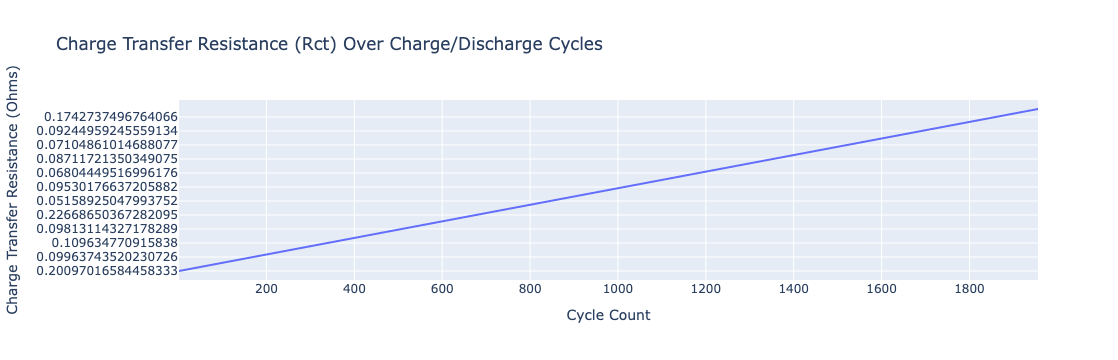

In [39]:
#Line plot for 'Rct' 
fig2 = px.line(df_cleaned, x='cycle_count', y='Rct', 
               title='Charge Transfer Resistance (Rct) Over Charge/Discharge Cycles',
               labels={'cycle_count': 'Cycle Count', 'Rct': 'Charge Transfer Resistance (Ohms)'})

# Show the plot
fig2.show()